**KLASIFIKASI KUALITAS WINE**

**Konteks**

Dalam industri anggur (wine), kualitas produk adalah faktor penentu utama untuk kesuksesan komersial, reputasi merek, dan penetapan harga. Secara tradisional, penilaian kualitas ini sangat bergantung pada panel pencicip manusia (human sommeliers), yang bisa menjadi proses yang subjektif, mahal, dan memakan waktu.

Oleh karena itu, penting bagi produsen untuk memiliki pemahaman yang baik tentang faktor-faktor obyektif (kimiawi) yang mempengaruhi kualitas akhir anggur. Kemampuan untuk memprediksi kualitas berdasarkan data terukur dapat membantu mengoptimalkan produksi dan menjaga konsistensi.

**Problem Statement**

Perusahaan (produsen anggur) menghadapi tantangan dalam menilai kualitas anggur secara konsisten dan obyektif di seluruh proses produksi. Ketergantungan pada penilaian sensorik manusia menciptakan inkonsistensi dan menghambat proses kontrol kualitas (QC) yang cepat.

Perusahaan perlu cara untuk memprediksi kualitas anggur secara lebih cepat dan terukur berdasarkan data kimiawinya (seperti keasaman, kadar alkohol, dan gula).

**Goals**

Tujuan utama dari proyek ini adalah membangun sebuah model klasifikasi yang dapat memprediksi tingkat quality anggur (pada skala 0 hingga 10) berdasarkan fitur-fitur kimiawinya.

Tujuan sekundernya adalah untuk mengidentifikasi prediktor (fitur) kimia mana yang paling berpengaruh terhadap kualitas anggur.

**PREPROCESSING**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mengimport library-library yang akan digunakan

In [35]:
#Memuat data latih dan data uji
df_train = pd.read_csv('/content/data_training.csv')
df_test = pd.read_csv('/content/data_testing.csv')
print("\nData Latih Berhasil Dimuat.")
print(f"Jumlah baris awal: {df_train.shape[0]}, Jumlah kolom: {df_train.shape[1]}")
print("\nData Uji Berhasil Dimuat.")
print(f"Jumlah baris awal: {df_test.shape[0]}, Jumlah kolom: {df_test.shape[1]}")
# 'quality' adalah target kita (y)
TARGET = 'quality'

# 'features' adalah semua kolom selain target
FEATURES = [col for col in df_train.columns if col != TARGET]


Data Latih Berhasil Dimuat.
Jumlah baris awal: 857, Jumlah kolom: 13

Data Uji Berhasil Dimuat.
Jumlah baris awal: 286, Jumlah kolom: 12


In [36]:
# --- Info Data Latih ---
print("\n--- Info Data Latih ---")
df_train.info()
# --- Pengecekan Data Duplikat ---
print("\n--- Pengecekan Data Duplikat ---")
duplicate_count = df_train.duplicated().sum()
print(f"Jumlah baris data duplikat ditemukan: {duplicate_count}")
# --- Cek Null atau Data Kosong ---
np.sum(df_train.isnull())


--- Info Data Latih ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB

--- Pengecekan Data Duplikat ---
Jumlah baris data d

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [37]:
# --- Info Data Uji---
print("\n--- Info Data Latih ---")
df_test.info()
# --- Pengecekan Data Duplikat ---
print("\n--- Pengecekan Data Duplikat ---")
duplicate_count = df_test.duplicated().sum()
print(f"Jumlah baris data duplikat ditemukan: {duplicate_count}")
# --- Cek Null atau Data Kosong ---
np.sum(df_test.isnull())


--- Info Data Latih ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         286 non-null    float64
 1   volatile acidity      286 non-null    float64
 2   citric acid           286 non-null    float64
 3   residual sugar        286 non-null    float64
 4   chlorides             286 non-null    float64
 5   free sulfur dioxide   286 non-null    float64
 6   total sulfur dioxide  286 non-null    float64
 7   density               286 non-null    float64
 8   pH                    286 non-null    float64
 9   sulphates             286 non-null    float64
 10  alcohol               286 non-null    float64
 11  Id                    286 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 26.9 KB

--- Pengecekan Data Duplikat ---
Jumlah baris data duplikat ditemukan: 0


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [38]:
np.sum(df_test.isnull())

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data tersebut merupakan data yang menggambarkan profil fisikokimia dari sampel anggur (wine). Data ini mencakup 11 atribut kimia yang berkontribusi terhadap kualitas anggur. Berikut adalah variabel-variabel yang terdapat dalam dataset:

**fixed acidity**: keasaman tetap (non-volatil) yang ada di wine.

**volatile acidity**: keasaman yang mudah menguap; kadar yang tinggi bisa menyebabkan rasa tidak enak (seperti cuka).

**citric acid**: asam sitrat, sering ditemukan dalam jumlah kecil dan dapat menambah 'kesegaran' pada wine.

**residual sugar**: sisa gula yang tertinggal setelah proses fermentasi berhenti.

**chlorides**: kadar klorida atau garam dalam wine.

**free sulfur dioxide**: sulfur dioksida (SO2) bebas; berfungsi sebagai pengawet untuk mencegah pertumbuhan mikroba dan oksidasi.

**total sulfur dioxide**: jumlah total SO2 (bentuk bebas dan terikat).

**density**: massa jenis atau kepadatan wine, sering dikaitkan dengan kadar alkohol dan gula.

**pH**: tingkat keasaman atau kebasaan wine.

**sulphates**: kadar sulfat, aditif yang juga berkontribusi pada pencegahan oksidasi dan pertumbuhan bakteri.

**alcohol**: kadar alkohol dalam persen volume.

**quality** (Variabel Target): skor kualitas anggur.

Data yang dimiliki mencakup berbagai variabel yang berkaitan dengan komposisi kimia anggur. Setiap baris dalam dataset mewakili informasi tentang satu sampel anggur, sementara setiap kolom merepresentasikan atribut atau pengukuran kimia tertentu yang dapat digunakan untuk memprediksi tingkat kualitas anggur.

Variabel-variabel seperti alcohol, volatile acidity, sulphates, dan citric acid dapat memberikan wawasan yang berharga tentang faktor-faktor yang mempengaruhi penilaian akhir kualitas sebuah anggur. Dengan memahami data ini, kita dapat mengembangkan model prediksi yang tepat untuk mengidentifikasi anggur yang berkualitas tinggi dan memahami faktor kimia apa yang paling berkontribusi terhadapnya.


Selain itu, hasil dari pengecekan missing value adalah tidak adanya cell yang kosong. Sehingga tidak perlu dilakukan imputasi. Pengecekan terhadap data duplikat juga telah dilakukan, hasilnya tidak ada data duplikat pada data set tersebut.

In [39]:
# --- Identifikasi Deskripsi & Pengecekan Unik ---
print("\n--- Statistik Deskriptif ---")
print(df_train.describe())


--- Statistik Deskriptif ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     857.000000        857.000000   857.000000      857.000000   
mean        8.261960          0.529393     0.267351        2.506184   
std         1.701992          0.179162     0.195144        1.293512   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.395000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.600000          1.580000     1.000000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  857.000000           857.000000            857.000000  857.000000   
mean     0.086830            15.782964             45.978413    0.996692   
std      0.048721            10.300402             31.692113    0.001901   
min      0.012000         

In [41]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df_train.columns :
    listItem.append( [col, df_train[col].nunique(), df_train[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,fixed acidity,87,"[7.3, 8.1, 10.1, 12.9, 8.4, 9.6, 8.5, 6.9, 6.0, 7.9, 9.3, 7.6, 6.6, 13.0, 7.7, 9.1, 11.1, 9.7, 11.4, 11.5, 9.8, 6.7, 10.8, 7.1, 6.8, 6.4, 7.0, 8.2, 8.8, 10.4, 6.5, 7.2, 5.9, 9.9, 10.7, 13.5, 8.0, 12.5, 9.0, 8.9, 7.5, 12.6, 5.3, 10.3, 7.4, 6.1, 12.8, 12.0, 6.2, 10.5, 7.8, 8.3, 11.3, 8.6, 6.3, 9.4, 13.3, 8.7, 9.2, 5.4, 5.6, 9.5, 10.0, 5.0, 11.9, 15.6, 11.2, 4.9, 13.4, 5.2, 5.1, 13.7, 10.6, 12.3, 11.6, 10.2, 11.7, 5.7, 15.0, 4.6, 12.2, 11.8, 5.8, 10.9, 12.4, 15.5, 12.7]"
1,volatile acidity,125,"[0.74, 0.575, 0.43, 0.5, 0.36, 0.6, 0.32, 0.49, 0.51, 0.825, 0.18, 0.72, 0.4, 0.63, 0.26, 0.765, 1.04, 0.3, 0.45, 0.42, 0.315, 0.41, 0.89, 0.69, 0.795, 0.57, 0.59, 0.28, 0.24, 0.885, 0.53, 0.79, 0.37, 0.395, 0.25, 0.56, 0.61, 0.35, 1.0, 0.67, 0.745, 0.98, 1.58, 0.22, 0.62, 0.685, 0.38, 0.635, 0.58, 0.835, 0.52, 0.33, 0.47, 0.21, 0.545, 0.415, 0.54, 0.935, 0.615, 0.55, 0.48, 0.66, 0.31, 0.46, 0.39, 0.2, 0.87, 0.27, 0.65, 0.75, 0.91, 0.725, 0.34, 0.875, 0.76, 0.73, 0.785, 0.845, 0.78, 0.605, 0.81, 0.83, 0.44, 0.77, 0.655, 0.715, 0.565, 0.84, 0.7, 0.695, 0.64, 0.88, 0.68, 0.975, 0.12, 0.29, 0.735, 0.915, 0.86, 0.955, ...]"
2,citric acid,75,"[0.08, 0.22, 0.4, 0.55, 0.32, 0.5, 0.42, 0.19, 0.0, 0.24, 0.51, 0.01, 0.36, 0.29, 0.65, 0.26, 0.04, 0.05, 0.68, 0.73, 0.46, 0.49, 0.54, 0.39, 0.27, 0.76, 0.3, 0.18, 0.6, 0.61, 0.14, 0.28, 0.21, 0.25, 0.03, 0.13, 0.37, 0.53, 0.09, 0.79, 0.58, 0.12, 0.06, 0.23, 0.17, 0.02, 0.66, 0.31, 0.2, 0.45, 0.43, 0.07, 0.41, 0.64, 0.47, 0.1, 0.72, 0.59, 0.74, 0.52, 0.34, 0.57, 0.48, 0.33, 0.38, 0.44, 0.69, 0.56, 0.11, 0.62, 0.35, 0.16, 0.15, 0.63, 1.0]"
3,residual sugar,74,"[1.7, 2.1, 2.6, 2.8, 2.2, 2.3, 1.75, 1.9, 1.8, 4.3, 2.0, 1.6, 8.3, 3.2, 2.7, 8.6, 2.5, 3.0, 2.4, 1.4, 4.8, 3.5, 3.3, 1.5, 5.8, 2.9, 6.3, 0.9, 4.0, 5.5, 3.4, 5.7, 3.1, 1.2, 3.8, 4.7, 3.7, 4.4, 1.3, 5.6, 5.9, 2.25, 6.1, 5.15, 7.9, 7.3, 3.45, 6.55, 4.5, 8.1, 4.65, 5.1, 5.0, 4.2, 6.7, 3.6, 7.2, 3.9, 4.1, 13.8, 2.05, 5.4, 6.4, 1.65, 6.2, 3.65, 8.8, 6.6, 6.0, 15.5, 5.2, 11.0, 4.6, 2.95]"
4,chlorides,123,"[0.094, 0.077, 0.092, 0.072, 0.081, 0.079, 0.075, 0.064, 0.084, 0.071, 0.076, 0.078, 0.093, 0.052, 0.062, 0.05, 0.066, 0.074, 0.085, 0.068, 0.611, 0.132, 0.08, 0.088, 0.065, 0.19, 0.104, 0.083, 0.166, 0.012, 0.087, 0.0559999999999999, 0.057, 0.063, 0.07, 0.12, 0.06, 0.114, 0.1369999999999999, 0.111, 0.067, 0.241, 0.069, 0.054, 0.213, 0.105, 0.086, 0.073, 0.09, 0.107, 0.119, 0.123, 0.096, 0.095, 0.103, 0.127, 0.049, 0.0969999999999999, 0.0579999999999999, 0.1169999999999999, 0.106, 0.089, 0.0819999999999999, 0.055, 0.099, 0.422, 0.091, 0.059, 0.414, 0.046, 0.039, 0.115, 0.1, 0.061, 0.0409999999999999, 0.118, 0.048, 0.102, 0.044, 0.122, 0.2, 0.043, 0.098, 0.178, 0.263, 0.171, 0.214, 0.042, 0.1009999999999999, 0.467, 0.045, 0.222, 0.153, 0.152, 0.038, 0.25, 0.11, 0.23, 0.4029999999999999, 0.205, ...]"
5,free sulfur dioxide,52,"[10.0, 12.0, 13.0, 7.0, 32.0, 28.0, 40.0, 5.0, 45.0, 6.0, 29.0, 51.0, 15.0, 19.0, 9.0, 4.0, 37.5, 3.0, 24.0, 8.0, 35.0, 18.0, 22.0, 25.0, 11.0, 36.0, 21.0, 17.0, 14.0, 23.0, 38.0, 16.0, 20.0, 37.0, 26.0, 40.5, 31.0, 34.0, 33.0, 30.0, 46.0, 27.0, 68.0, 39.0, 52.0, 1.0, 48.0, 43.0, 41.0, 66.0, 53.0, 42.0]"
6,total sulfur dioxide,129,"[45.0, 65.0, 52.0, 24.0, 79.0, 71.0, 19.0, 26.0, 54.0, 13.0, 88.0, 32.0, 17.0, 66.0, 77.5, 47.0, 77.0, 31.0, 14.0, 29.0, 278.0, 22.0, 16.0, 41.0, 15.0, 9.0, 148.0, 60.0, 70.0, 86.0, 91.0, 58.0, 57.0, 12.0, 100.0, 68.0, 49.0, 28.0, 33.0, 18.0, 46.0, 37.0, 62.0, 43.0, 64.0, 152.0, 75.0, 20.0, 84.0, 25.0, 53.0, 27.0, 44.0, 48.0, 165.0, 38.0, 35.0, 40.0, 114.0, 42.0, 56.0, 8.0, 61.0, 39.0, 63.0, 34.0, 99.0, 51.0, 10.0, 109.0, 94.0, 23.0, 142.0, 106.0, 85.0, 69.0, 59.0, 72.0, 89.0, 21.0, 119.0, 143.0, 36.0, 105.0, 144.0, 80.0, 74.0, 11.0, 112.0, 102.0, 134.0, 55.0, 30.0, 87.0, 122.0, 67.0, 128.0, 130.0, 50.0, 151.0, ...]"
7,density,339,"[0.99576, 0.9967, 0.99834, 1.00012, 0.9964, 0.9997, 0.99434, 0.99547, 0.995, 0.9972, 0.99524, 0.99668, 0.99704, 0.99

Dari analisis statistik deskriptif tersebut menunjukkan bahwa rata-rata alcohol adalah sekitar 10.43% dengan variasi yang signifikan (standar deviasi 1.07). Rata-rata volatile acidity (keasaman yang mudah menguap) adalah 0.53, yang merupakan salah satu faktor penting yang mempengaruhi rasa.

Untuk komponen kimia lainnya, rata-rata fixed acidity adalah 8.30, dan pH rata-rata adalah 3.31. Rata-rata residual sugar (sisa gula) adalah 2.52, sementara rata-rata total sulfur dioxide (pengawet) adalah 45.73.

Fokus utama kita, variabel target quality, memiliki skor rata-rata 5.63. Nilai tengah (median atau persentil 50%) adalah 6, yang menunjukkan bahwa sebagian besar anggur dalam dataset ini memiliki kualitas 'sedang' (skor 5 dan 6). Rentang kualitas data latih ini berkisar dari skor terendah 3 hingga skor tertinggi 8.

Dari pengecekan unik juga terlihat bahwa data bernilai numerik semua kecuali data yang menjadi target yaitu data quality yang merupakan data kategorik


--- Pengecekan Outlier (menggunakan Boxplot) ---


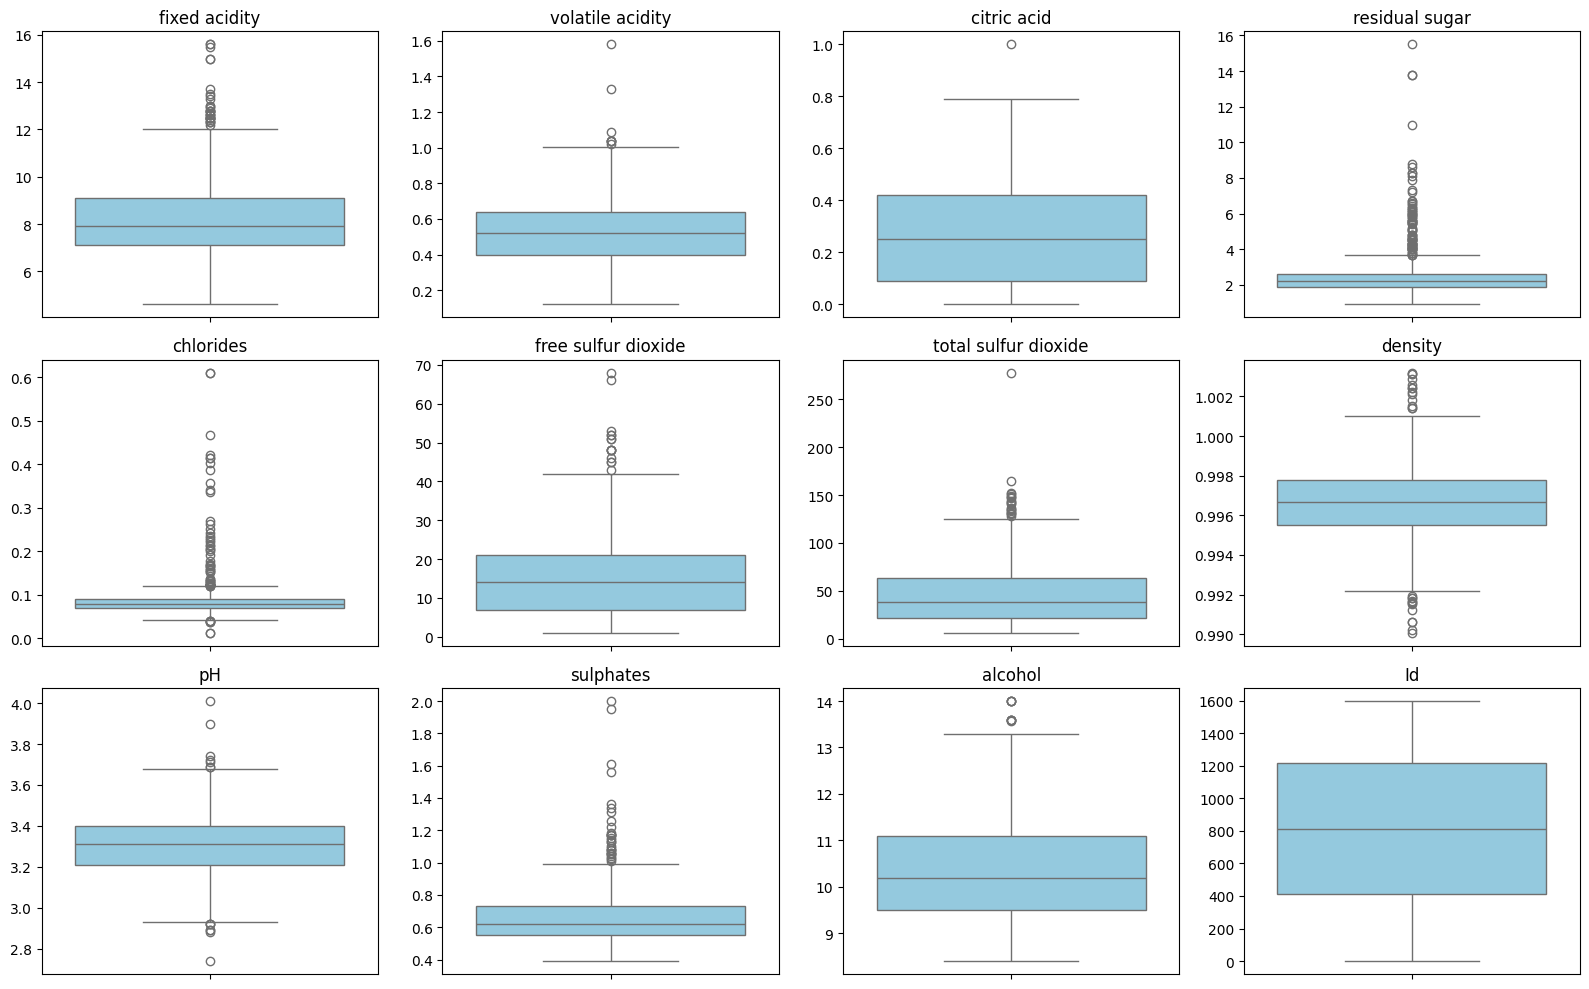

In [42]:
# --- Pengecekan Outlier ---
print("\n--- Pengecekan Outlier (menggunakan Boxplot) ---")
plt.figure(figsize=(16, 10))
for i, col in enumerate(FEATURES):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_train[col], color='skyblue')
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

Setelah dilakukan pengecekan outlier diperoleh bahwa pada semua variabel terdapat outlier, kecuali variabel Id


--- Langkah 3 (Modifikasi): Cek Distribusi Fitur ---
Mengecek kecondongan (skewness) untuk merekomendasikan metode deteksi outlier.


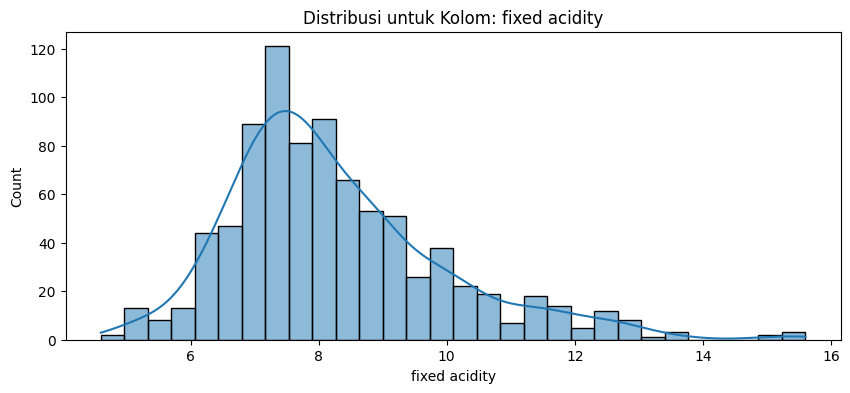

Skewness untuk fixed acidity: 1.09
-> Rekomendasi untuk fixed acidity: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


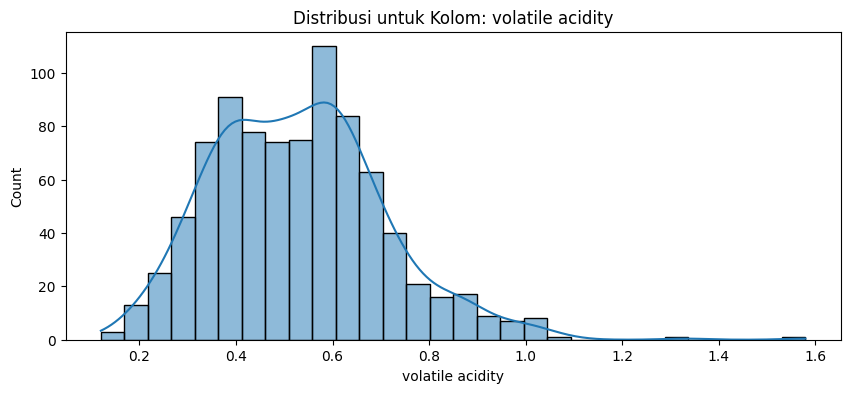

Skewness untuk volatile acidity: 0.67
-> Rekomendasi untuk volatile acidity: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


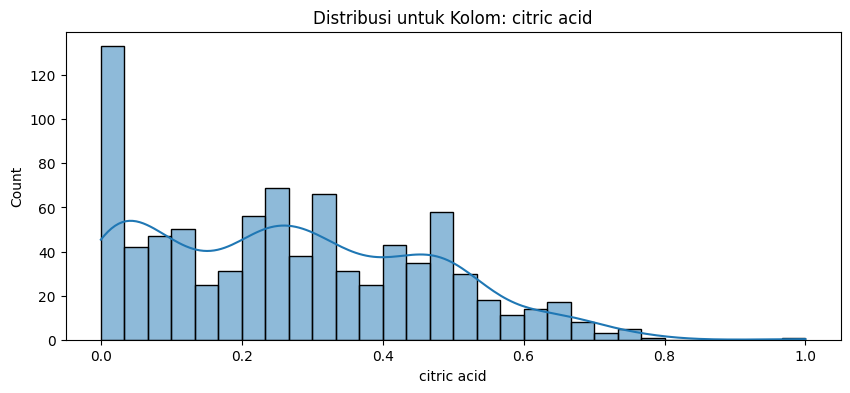

Skewness untuk citric acid: 0.38
-> Rekomendasi untuk citric acid: Distribusi normal. Metode Z-Score (berbasis Mean) aman digunakan.


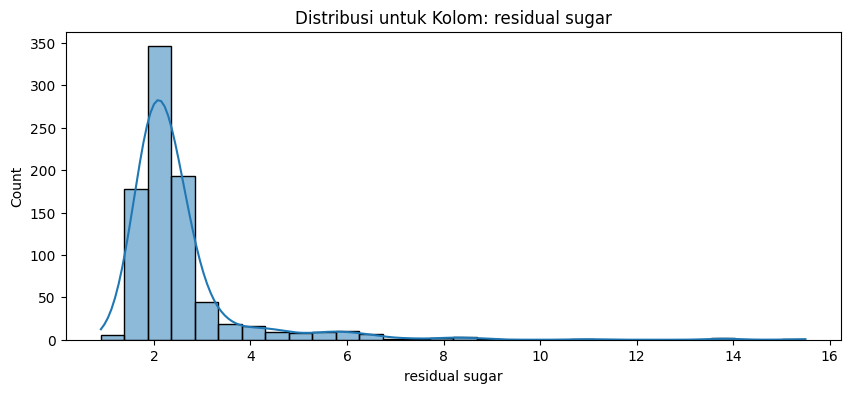

Skewness untuk residual sugar: 4.54
-> Rekomendasi untuk residual sugar: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


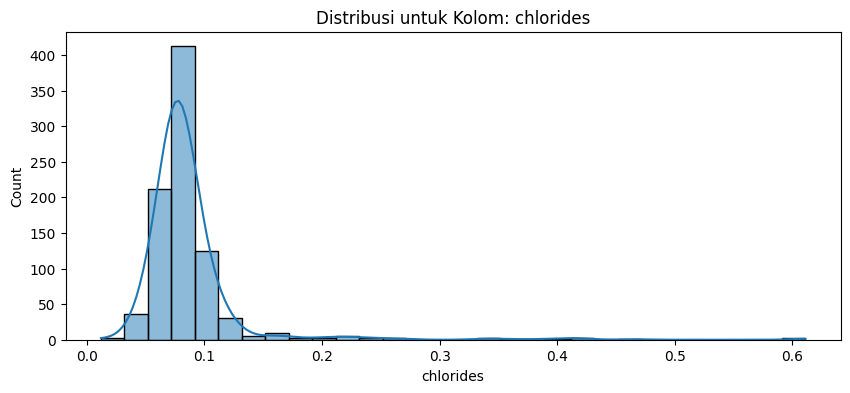

Skewness untuk chlorides: 6.09
-> Rekomendasi untuk chlorides: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


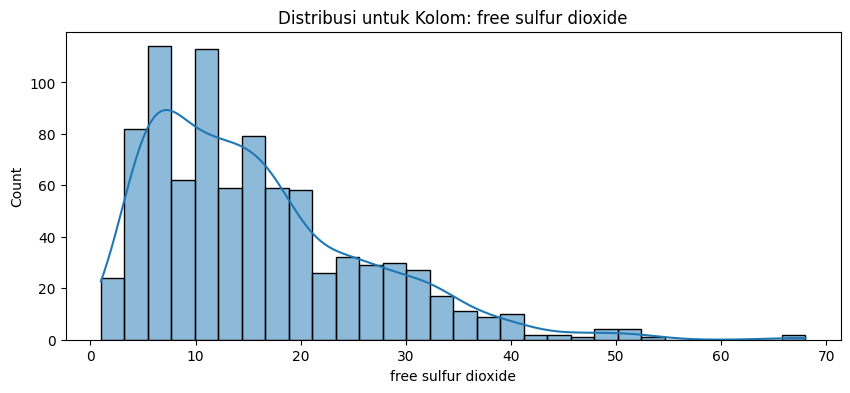

Skewness untuk free sulfur dioxide: 1.20
-> Rekomendasi untuk free sulfur dioxide: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


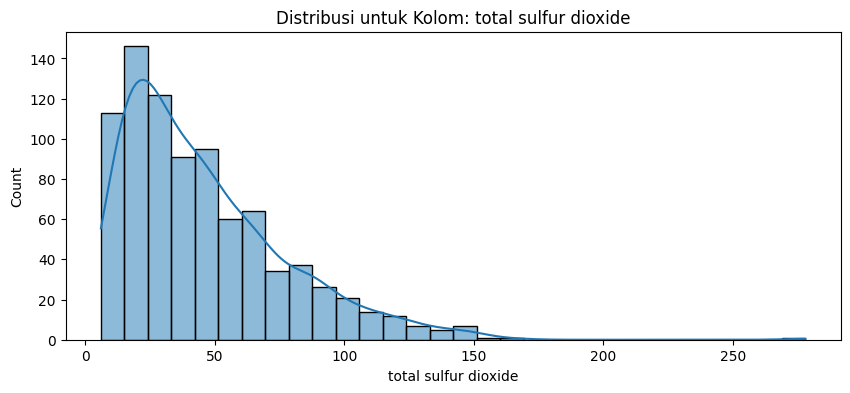

Skewness untuk total sulfur dioxide: 1.46
-> Rekomendasi untuk total sulfur dioxide: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


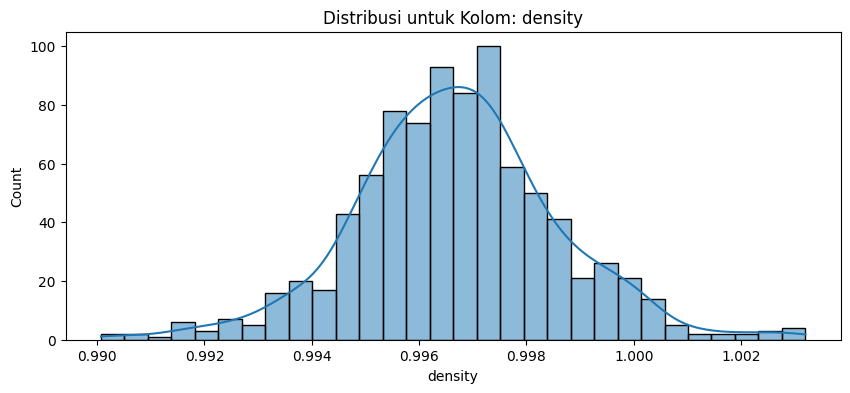

Skewness untuk density: 0.08
-> Rekomendasi untuk density: Distribusi normal. Metode Z-Score (berbasis Mean) aman digunakan.


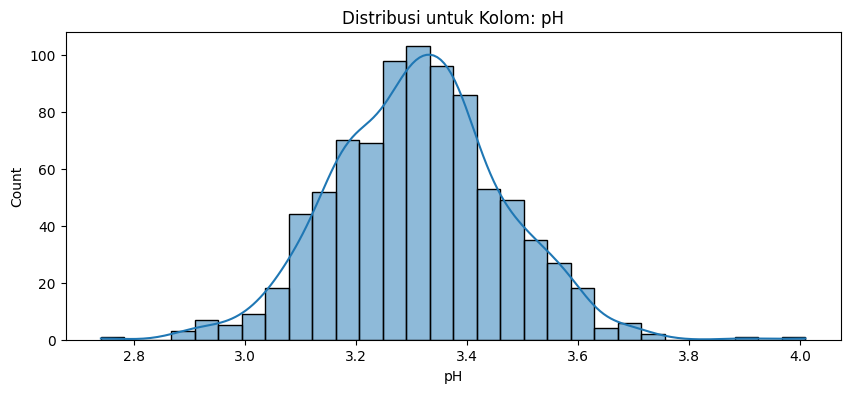

Skewness untuk pH: 0.12
-> Rekomendasi untuk pH: Distribusi normal. Metode Z-Score (berbasis Mean) aman digunakan.


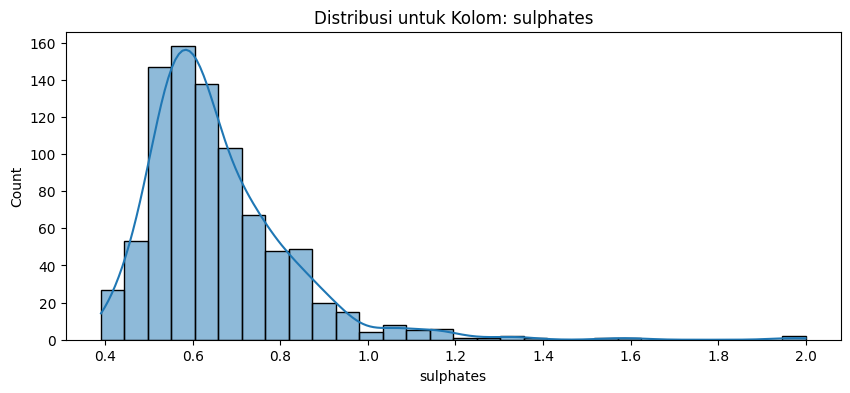

Skewness untuk sulphates: 2.40
-> Rekomendasi untuk sulphates: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


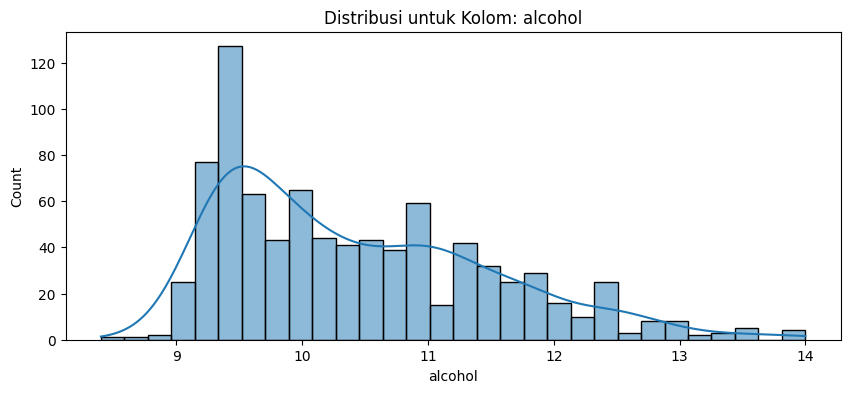

Skewness untuk alcohol: 0.82
-> Rekomendasi untuk alcohol: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.


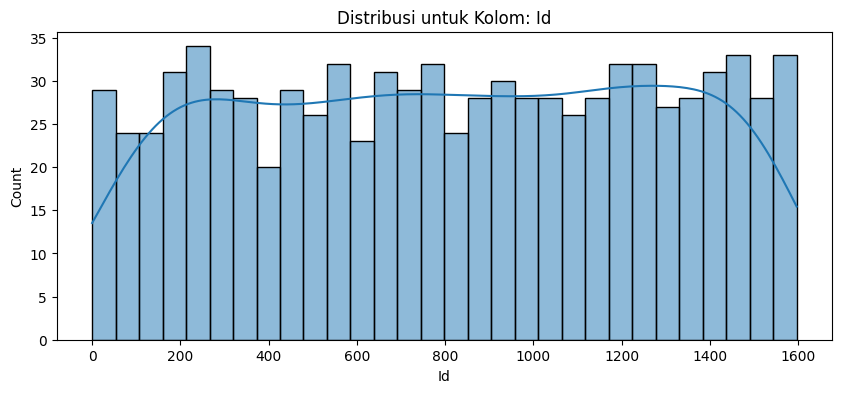

Skewness untuk Id: -0.03
-> Rekomendasi untuk Id: Distribusi normal. Metode Z-Score (berbasis Mean) aman digunakan.

Total Fitur Normal: 4
Total Fitur Condong (Skewed): 8

Kesimpulan: Karena sebagian besar fitur condong, metode IQR adalah pilihan yang lebih robust secara keseluruhan.


In [43]:
# --- (MODIFIKASI) Langkah 3: Cek Distribusi untuk Rekomendasi Metode Outlier ---
print("\n--- Langkah 3 (Modifikasi): Cek Distribusi Fitur ---")
print("Mengecek kecondongan (skewness) untuk merekomendasikan metode deteksi outlier.")

skewed_features = []
normal_features = []

for col in FEATURES:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribusi untuk Kolom: {col}')
    plt.show()

    skewness = df_train[col].skew()
    print(f"Skewness untuk {col}: {skewness:.2f}")

    # Aturan umum: |skewness| > 0.5 dianggap condong
    if -0.5 <= skewness <= 0.5:
        print(f"-> Rekomendasi untuk {col}: Distribusi normal. Metode Z-Score (berbasis Mean) aman digunakan.")
        normal_features.append(col)
    else:
        print(f"-> Rekomendasi untuk {col}: Distribusi condong. Metode IQR (berbasis Median) LEBIH DISARANKAN.")
        skewed_features.append(col)

print(f"\nTotal Fitur Normal: {len(normal_features)}")
print(f"Total Fitur Condong (Skewed): {len(skewed_features)}")
print("\nKesimpulan: Karena sebagian besar fitur condong, metode IQR adalah pilihan yang lebih robust secara keseluruhan.")

Dari hasil tes distribusi terlihat bahwa sebagian besar variabel condong (skewness), jadi untuk menghitung outlier dilakukan metode IQR


In [44]:
print("--- Menghitung Jumlah Outlier (Metode IQR) ---")

# Kita hanya akan mengecek outlier pada kolom-kolom fitur
df_fitur = df_train[FEATURES]

# 1. Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3)
Q1 = df_fitur.quantile(0.25)
Q3 = df_fitur.quantile(0.75)

# 2. Hitung Interquartile Range (IQR)
IQR = Q3 - Q1
print("\nBatas IQR (1.5 * IQR):")
print(IQR * 1.5)

# 3. Tentukan Batas Atas dan Batas Bawah
# Batas bawah = Q1 - (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
# Batas atas = Q3 + (1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# 4. Temukan outlier
# Buat DataFrame boolean, True jika nilai adalah outlier
outlier_mask = (df_fitur < lower_bound) | (df_fitur > upper_bound)

# 5. Hitung jumlah outlier per kolom
outlier_counts = outlier_mask.sum()

print("\n--- Jumlah Outlier per Variabel ---")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

if outlier_counts.sum() == 0:
    print("Tidak ditemukan outlier signifikan dengan metode IQR.")

--- Menghitung Jumlah Outlier (Metode IQR) ---

Batas IQR (1.5 * IQR):
fixed acidity              3.00000
volatile acidity           0.36750
citric acid                0.49500
residual sugar             1.05000
chlorides                  0.03000
free sulfur dioxide       21.00000
total sulfur dioxide      63.00000
density                    0.00342
pH                         0.28500
sulphates                  0.27000
alcohol                    2.40000
Id                      1201.50000
dtype: float64

--- Jumlah Outlier per Variabel ---
residual sugar          76
chlorides               59
sulphates               31
fixed acidity           30
density                 25
total sulfur dioxide    19
free sulfur dioxide     15
pH                      14
alcohol                  9
volatile acidity         8
citric acid              1
dtype: int64


Setelah dihitung menggunakan IQR terdapat banyak sekali outlier. Apabila menghapus outlier, maka data akan berkurang 10% lebih. Olehbkarena itu, dilakukan scaller menggunakan robust scaller (metode ini juga direkomendasikan digunakan pada data yang skewness)



--- Pengecekan Imbalanced Data (Target 'quality') ---


/tmp/ipython-input-4216888432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET, data=df_train, palette='viridis')


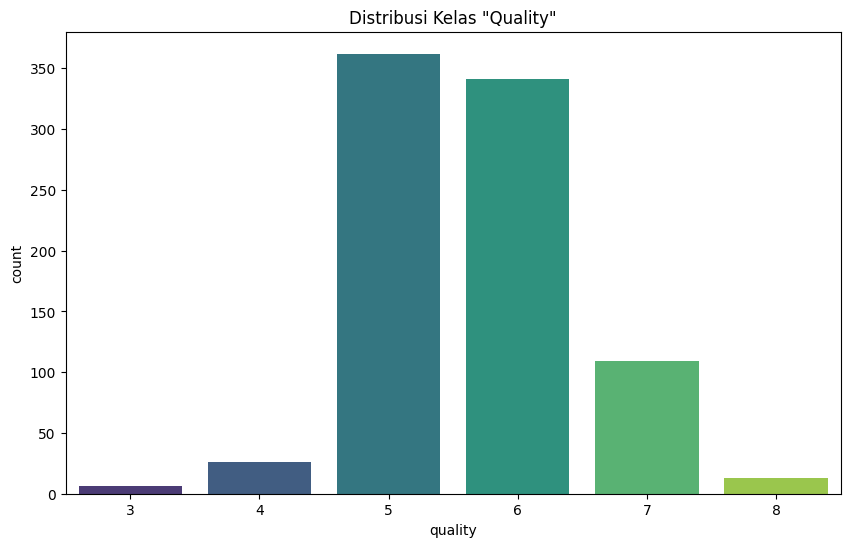

Persentase tiap kelas 'quality':
quality
5    42.240373
6    39.789965
7    12.718786
4     3.033839
8     1.516919
3     0.700117
Name: proportion, dtype: float64

Analisis Imbalance: SANGAT IMBALANCED.


In [45]:
# --- Pengecekan Imbalanced Data (pada Target 'quality') ---
print("\n--- Pengecekan Imbalanced Data (Target 'quality') ---")
plt.figure(figsize=(10, 6))
sns.countplot(x=TARGET, data=df_train, palette='viridis')
plt.title('Distribusi Kelas "Quality"')
plt.show()

quality_dist = df_train[TARGET].value_counts(normalize=True) * 100
print("Persentase tiap kelas 'quality':")
print(quality_dist)
print("\nAnalisis Imbalance: SANGAT IMBALANCED.")

Dari analisis, diperoleh bahwa data sangat imbalanced.

In [46]:
X=df_train.drop(columns=['quality'])
y=df_train['quality']

In [47]:
#Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Melakukan splitting data train 80% dan data test20%

In [48]:
from sklearn.preprocessing import RobustScaler

# Memisahkan kolom 'Id' karena ini adalah kolom identifikasi dan tidak perlu diskalakan
# Serta 'quality' yang merupakan target
features_to_scale = [col for col in FEATURES if col != 'Id']

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Melakukan scaling pada X_train
X_train_scaled = X_train.copy()
X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Melakukan scaling pada X_test menggunakan scaler yang sama yang telah difit pada X_train
X_test_scaled = X_test.copy()
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Juga "scaling" df_test untuk konsistensi, karena ini adalah data yang akan diprediksi
df_test_scaled = df_test.copy()
df_test_scaled[features_to_scale] = scaler.transform(df_test[features_to_scale])

print("Data training (X_train) setelah scaling dengan RobustScaler:")
display(X_train_scaled.head())

print("\nData testing (X_test) setelah scaling dengan RobustScaler:")
display(X_test_scaled.head())

print("\nData uji (df_test) setelah scaling dengan RobustScaler:")
display(df_test_scaled.head())

Data training (X_train) setelah scaling dengan RobustScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
196,-0.052632,0.24,-0.727273,-0.666667,0.555556,-0.076923,-0.475,-0.434783,0.00,-0.352941,0.176471,1029
645,2.368421,-0.08,0.727273,0.000000,0.611111,-0.615385,-0.575,1.530435,-0.65,-1.058824,-0.352941,580
122,-0.052632,0.68,-0.606061,0.833333,-0.166667,0.153846,-0.250,0.313043,-0.30,-0.058824,-0.647059,404
851,0.105263,-0.40,-0.242424,-0.333333,-0.277778,-0.538462,-0.475,0.226087,-0.15,-0.058824,-0.588235,172
167,0.421053,0.44,-0.242424,1.166667,1.166667,0.615385,2.050,0.573913,-1.15,-0.588235,-0.529412,789



Data testing (X_test) setelah scaling dengan RobustScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
144,0.789474,-0.48,0.727273,0.500000,0.388889,1.923077,2.625,0.486957,-0.5,-0.411765,-0.470588,523
774,-0.263158,0.84,-0.030303,-0.500000,1.666667,0.384615,1.625,0.008696,-0.3,-0.176471,-0.529412,587
263,0.052632,0.10,-0.575758,3.000000,0.500000,1.076923,0.600,-0.078261,0.2,0.294118,0.294118,270
788,-0.157895,0.36,-0.151515,-0.833333,-0.111111,1.769231,0.575,-0.756522,-1.1,-1.294118,-0.529412,1240
846,0.000000,1.18,-0.727273,0.666667,-0.222222,2.692308,1.325,-0.204348,0.3,0.000000,0.352941,1231



Data uji (df_test) setelah scaling dengan RobustScaler:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.526316,0.36,-0.636364,-1.166667,-1.166667,-0.615385,-0.675,-0.621739,0.50,-0.117647,-0.411765,222
1,-0.473684,1.28,-0.121212,3.166667,-0.222222,0.230769,0.700,0.756522,1.05,0.588235,-0.568627,1514
2,-0.421053,0.24,-0.393939,-0.500000,0.722222,1.615385,2.175,-0.469565,0.60,-0.823529,0.176471,417
3,0.000000,-0.16,1.303030,-0.833333,18.722222,0.076923,-0.125,-0.052174,-1.15,2.588235,-0.647059,754
4,2.473684,0.32,0.727273,3.500000,1.222222,-0.615385,-0.575,1.878261,-0.35,0.705882,1.000000,516


Digunakan feature scalling menggunakan robust scaller karena hal ini distribusi cenderung skewness (tidak normal)

In [49]:
# Deskripsi singkat data training
print("Info Data Training:")
print(X_train_scaled.info())

# Deskripsi singkat data testing
print("Info Data Testing:")
print(X_test_scaled.info())

Info Data Training:
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 196 to 684
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         685 non-null    float64
 1   volatile acidity      685 non-null    float64
 2   citric acid           685 non-null    float64
 3   residual sugar        685 non-null    float64
 4   chlorides             685 non-null    float64
 5   free sulfur dioxide   685 non-null    float64
 6   total sulfur dioxide  685 non-null    float64
 7   density               685 non-null    float64
 8   pH                    685 non-null    float64
 9   sulphates             685 non-null    float64
 10  alcohol               685 non-null    float64
 11  Id                    685 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 69.6 KB
None
Info Data Testing:
<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 144 to 822
Data columns (total

Dalam pelatihan model akan digunakan data latih sebanyak 685 dan data uji sebanyak 172


**PELATIHAN MODEL**

In [50]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,average_precision_score,roc_auc_score
from sklearn.metrics import r2_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Import libarary Gaussian Naive Bayes
from sklearn import naive_bayes

In [51]:
logreg = LogisticRegression(solver= 'lbfgs', max_iter=5000) # Increased max_iter to address ConvergenceWarning
logreg.fit(X_train_scaled, y_train)
Y_predlr = logreg.predict(X_test_scaled)
accuracy_lr=round(accuracy_score(y_test, Y_predlr)* 100, 2)
acc_log = round(logreg.score(X_train_scaled, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predlr)
accuracy = accuracy_score(y_test,Y_predlr)
# Specify 'average' for multiclass classification metrics
precision = precision_score(y_test, Y_predlr, average='weighted', zero_division=0) # Added zero_division to handle UndefinedMetricWarning
recall = recall_score(y_test, Y_predlr, average='weighted')
f1 = f1_score(y_test,Y_predlr, average='weighted')

# Calculate probabilities for ROC AUC. For multiclass, predict_proba returns probabilities for each class.
logreg_probs = logreg.predict_proba(X_test_scaled)
# For multiclass ROC AUC, you need to specify multi_class and average strategy
# 'ovr' (one-vs-rest) is a common strategy for multiclass ROC AUC.
# Pass logreg.classes_ to 'labels' to explicitly tell roc_auc_score the order of classes, fixing ValueError
logreg_auc = roc_auc_score(y_test, logreg_probs, multi_class='ovr', average='weighted', labels=logreg.classes_)

print('Confusion matrix for Logistic Regression with 80% : 20% \n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)
print('ROC-AUC-score_Logistic Regression : %.3f' %logreg_auc)

Confusion matrix for Logistic Regression with 80% : 20% 
 [[ 1  4  1  0  0]
 [ 0 58 15  1  0]
 [ 0 18 42 10  0]
 [ 0  0 14  5  0]
 [ 0  0  3  0  0]]
accuracy_Logistic Regression : 0.616
precision_Logistic Regression : 0.609
recall_Logistic Regression: 0.616
f1-score_Logistic Regression : 0.601
ROC-AUC-score_Logistic Regression : 0.805


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


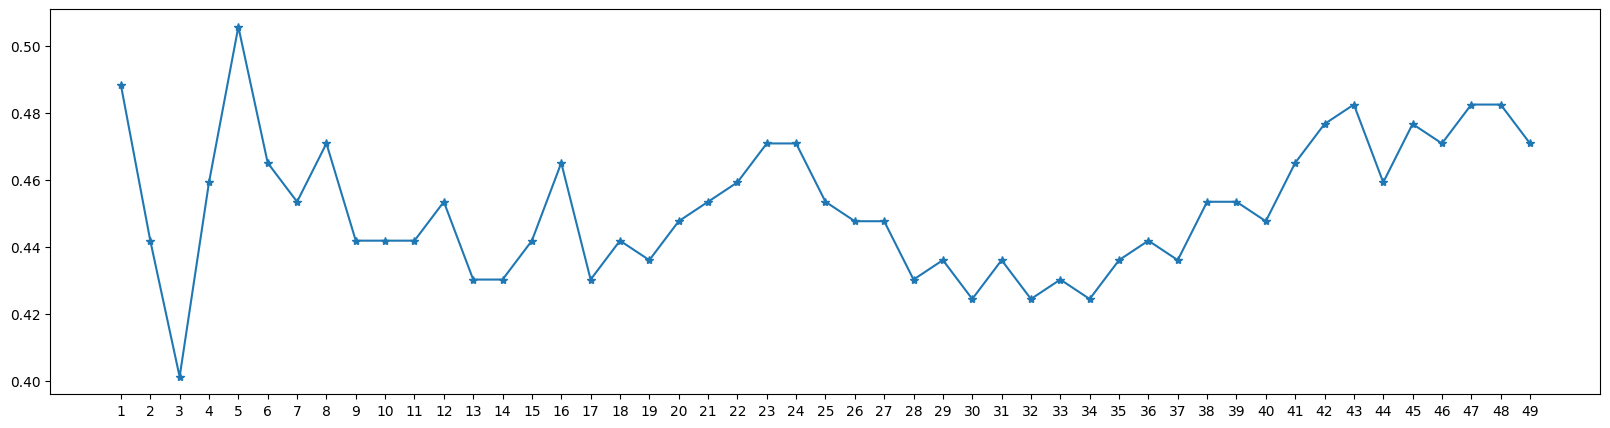

In [52]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
accuracy_scores = [] # Initialize as a list to store accuracy scores
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    prediction=model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test,prediction)) # Append to the list
plt.plot(a_index, accuracy_scores, marker="*") # Plot the list directly
plt.xticks(x)
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train)
Y_predknn = knn.predict(X_test_scaled)
accuracy_knn=round(accuracy_score(y_test,Y_predknn)* 100, 2)
acc_knn = round(knn.score(X_train_scaled, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predknn)
accuracy = accuracy_score(y_test,Y_predknn)
# Specify 'average' for multiclass classification metrics
precision = precision_score(y_test, Y_predknn, average='weighted', zero_division=0)
recall = recall_score(y_test, Y_predknn, average='weighted')
f1 = f1_score(y_test,Y_predknn, average='weighted')
# average_precision_score is typically for binary classification or one-vs-rest with binarized labels.
# It's omitted here for simplicity in a direct multiclass context.
# PRscore = average_precision_score(y_test,Y_predknn)

knn_probs = knn.predict_proba(X_test_scaled)
# For multiclass ROC AUC, specify multi_class='ovr' and average='weighted'
knn_auc = roc_auc_score(y_test, knn_probs, multi_class='ovr', average='weighted', labels=knn.classes_)

print('Confusion matrix for KNN with 80% : 20% \n', cm)
print('accuracy_KNN : %.3f' % accuracy)
print('precision_KNN : %.3f' % precision)
print('recall_KNN: %.3f' % recall)
print('f1-score_KNN : %.3f' % f1)
# print('PR-score_KNN : %.3f' %PRscore)
print('ROC-AUC-score_KNN : %.3f' %knn_auc)

Confusion matrix for KNN with 80% : 20% 
 [[ 0  0  0  0  0  0]
 [ 0  0  3  2  1  0]
 [ 0  1 41 24  7  1]
 [ 1  0 24 36  6  3]
 [ 0  1  2  8  7  1]
 [ 0  0  0  3  0  0]]
accuracy_KNN : 0.488
precision_KNN : 0.490
recall_KNN: 0.488
f1-score_KNN : 0.489
ROC-AUC-score_KNN : 0.601


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [54]:
gaussian = naive_bayes.GaussianNB()
gaussian.fit(X_train_scaled, y_train)
Y_prednb = gaussian.predict(X_test_scaled)
accuracy_nb=round(accuracy_score(y_test,Y_prednb)* 100, 2)
acc_gaussian = round(gaussian.score(X_train_scaled, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_prednb)
accuracy = accuracy_score(y_test,Y_prednb)
precision = precision_score(y_test, Y_prednb, average='weighted', zero_division=0)
recall = recall_score(y_test, Y_prednb, average='weighted', zero_division=0)
f1 = f1_score(y_test,Y_prednb, average='weighted', zero_division=0)
# average_precision_score is typically for binary classification or one-vs-rest with binarized labels.
# It's omitted here for simplicity in a direct multiclass context.
# PRscore = average_precision_score(y_test,Y_prednb)

nb_probs = gaussian.predict_proba(X_test_scaled)
# For multiclass ROC AUC, specify multi_class='ovr' and average='weighted'
nb_auc = roc_auc_score(y_test, nb_probs, multi_class='ovr', average='weighted', labels=gaussian.classes_)

print('Confusion matrix for Naive Bayes with 80% : 20%\n', cm)
print('accuracy_Naive Bayes: %.3f' % accuracy)
print('precision_Naive Bayes: %.3f' % precision)
print('recall_Naive Bayes: %.3f' % recall)
print('f1-score_Naive Bayes : %.3f' % f1)
# print('PR-score_Naive Bayes : %.3f' %PRscore)
print('ROC-AUC-score_Naive Bayes : %.3f' %nb_auc)

Confusion matrix for Naive Bayes with 80% : 20%
 [[ 0  0  0  0  0  0]
 [ 0  1  3  2  0  0]
 [ 2  2 49 18  2  1]
 [ 0  1 18 39 12  0]
 [ 0  0  0  9 10  0]
 [ 0  0  0  1  2  0]]
accuracy_Naive Bayes: 0.576
precision_Naive Bayes: 0.582
recall_Naive Bayes: 0.576
f1-score_Naive Bayes : 0.577
ROC-AUC-score_Naive Bayes : 0.780


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [55]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
Y_predrf = random_forest.predict(X_test_scaled)
accuracy_rf=round(accuracy_score(y_test,Y_predrf)* 100, 2)
acc_random_forest = round(random_forest.score(X_train_scaled, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predrf)
accuracy = accuracy_score(y_test,Y_predrf)
# For multiclass, specify 'average' parameter
precision = precision_score(y_test, Y_predrf, average='weighted', zero_division=0)
recall = recall_score(y_test, Y_predrf, average='weighted', zero_division=0)
f1 = f1_score(y_test,Y_predrf, average='weighted', zero_division=0)
# average_precision_score is typically for binary classification or one-vs-rest with binarized labels.
# It's omitted here for simplicity in a direct multiclass context.
# PRscore = average_precision_score(y_test,Y_predrf)

rf_probs= random_forest.predict_proba(X_test_scaled)
# For multiclass ROC AUC, specify multi_class='ovr' and average='weighted'
rf_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr', average='weighted', labels=random_forest.classes_)

print('Confusion matrix for Random Forest with 80% : 20%\n', cm)
print('accuracy_random_Forest : %.3f' % accuracy)
print('precision_random_Forest : %.3f' % precision)
print('recall_random_Forest : %.3f' % recall)
print('f1-score_random_Forest : %.3f' % f1)
# print('PR-score_random_Forest : %.3f' %PRscore)
print('ROC-AUC-score_random_Forest : %.3f' %rf_auc)

Confusion matrix for Random Forest with 80% : 20%
 [[ 0  5  1  0  0]
 [ 0 63 11  0  0]
 [ 0 15 49  6  0]
 [ 0  0 10  9  0]
 [ 0  0  2  1  0]]
accuracy_random_Forest : 0.703
precision_random_Forest : 0.662
recall_random_Forest : 0.703
f1-score_random_Forest : 0.681
ROC-AUC-score_random_Forest : 0.864


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
Y_preddt = decision_tree.predict(X_test_scaled)
accuracy_dt=round(accuracy_score(y_test,Y_preddt)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train_scaled, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_preddt)
accuracy = accuracy_score(y_test,Y_preddt)
precision = precision_score(y_test, Y_preddt, average='weighted', zero_division=0)
recall = recall_score(y_test, Y_preddt, average='weighted', zero_division=0)
f1 = f1_score(y_test,Y_preddt, average='weighted', zero_division=0)
#PRscore = average_precision_score(y_test,Y_preddt,average='weighted', zero_division=0)

dt_probs= decision_tree.predict_proba(X_test_scaled)

dt_auc = roc_auc_score(y_test, dt_probs, multi_class='ovr', average='weighted', labels=random_forest.classes_)

print('Confusion matrix for Decision Tree with 80% : 20%\n', cm)
print('accuracy_Decision Tree : %.3f' % accuracy)
print('precision_Decision Tree : %.3f' % precision)
print('recall_Decision Tree : %.3f' % recall)
print('f1-score_Decision Tree : %.3f' % f1)
#print('PR-score_Decision Tree : %.3f' %PRscore)

Confusion matrix for Decision Tree with 80% : 20%
 [[ 0  0  0  0  0  0]
 [ 1  0  3  0  2  0]
 [ 1  3 55 12  3  0]
 [ 0  1 17 42  9  1]
 [ 0  0  1  6 12  0]
 [ 0  0  3  0  0  0]]
accuracy_Decision Tree : 0.634
precision_Decision Tree : 0.635
recall_Decision Tree : 0.634
f1-score_Decision Tree : 0.631


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [57]:
results = pd.DataFrame({
    'Model': ['Random Forest',
              'Decision Tree',
              'KNN',
              'Logistic Regression',
              'Naive Bayes'],
    'Score': [acc_random_forest,
              acc_decision_tree,
              acc_knn,
              acc_log,
              acc_gaussian],
    "Accuracy_score":[accuracy_rf,
                      accuracy_dt,
                      accuracy_knn,
                      accuracy_lr,
                      accuracy_nb
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df_20 = result_df.reset_index(drop=True)
result_df_20.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,70.35
1,Decision Tree,100.00,63.37
2,Logistic Regression,59.85,61.63
3,Naive Bayes,56.64,57.56
4,KNN,100.00,48.84


Dari hasil pelatihan diperolehg bahwa metode random forest menjadi metode terbaik karena mempunyai akurasi 70.35%

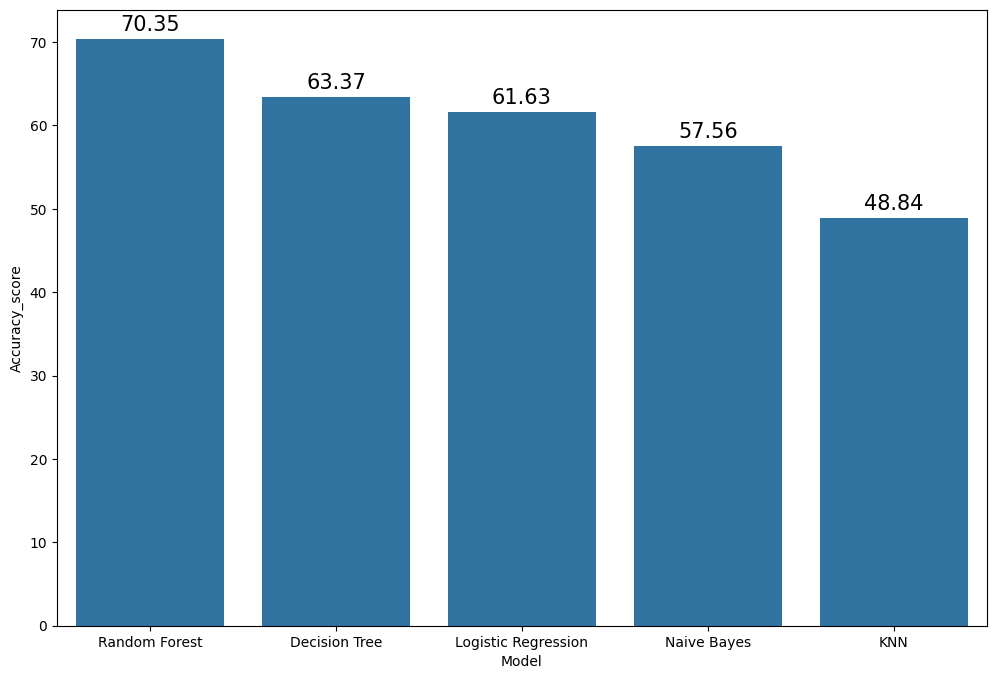

In [58]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df_20)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

Text(0.5, 23.52222222222222, 'Predicted label')

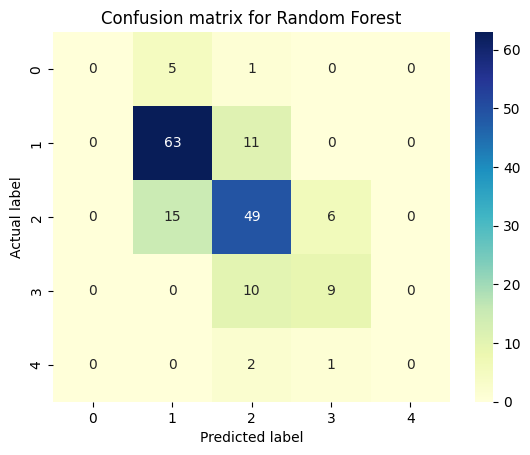

In [59]:
from sklearn import metrics
cm = confusion_matrix(y_test, random_forest.predict(X_test_scaled))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title("Confusion matrix for Random Forest")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**PREDIKSI**

In [62]:
print('Membuat prediksi dengan model Random Forest...')

# 1. Gunakan model `random_forest` untuk membuat prediksi
# `df_test_scaled` sudah memiliki kolom 'Id' dan fitur lainnya,
# sehingga dapat langsung digunakan untuk prediksi agar sesuai dengan training data.
df_test_predictions = random_forest.predict(df_test_scaled)

# 2. Buat DataFrame baru bernama submission_df
submission_df = pd.DataFrame({
    'Id': df_test_scaled['Id'], # Ambil Id dari df_test_scaled
    'quality': df_test_predictions
})

# 3. Cetak pesan dan tampilkan lima baris pertama dari submission_df
print('DataFrame hasil prediksi (submission_df):')
display(submission_df.head())

# 4. Cetak pesan dan tampilkan distribusi nilai dari kolom 'quality' dalam submission_df
print('\nDistribusi prediksi kualitas:')
display(submission_df['quality'].value_counts())

Membuat prediksi dengan model Random Forest...
DataFrame hasil prediksi (submission_df):


,Id,quality
0,222,6
1,1514,6
2,417,5
3,754,5
4,516,5



Distribusi prediksi kualitas:


,count
quality,
5,130
6,126
7,30


In [63]:
NIM_TERAKHIR = '045' # Ganti '123' dengan NIM terakhir Anda
filename = f'hasilprediksi_{NIM_TERAKHIR}.csv'
submission_df.to_csv(filename, index=False, sep=';')
print(f'Prediksi berhasil disimpan ke {filename}')

Prediksi berhasil disimpan ke hasilprediksi_045.csv


karena metode random forest adalah yang terbaik, maka dilakukan prediksi ke beberapa data yang diberikan (data_testing.csv). Lalu, disimpan sebagai hasilprediksi_045.csv